# Penguins Species Classification
# This exercise illustates Bayesian classification assuming Gaussian distribution under three different assumptions
# In Naive Bayesian, the features are assumed independent
# In LDA, the data from all classes is pooled under the assumption that there is a common covariance matrix
# In QDA, each class has its own covariance matrix

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iksinc/ML-Stuff/blob/main/GaussianClassifiers.ipynb)

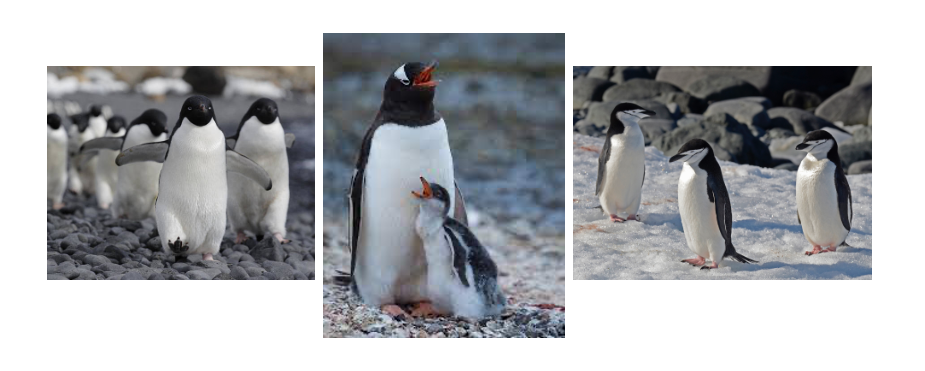

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Load data from Seaborn Library
penguins = sns.load_dataset("penguins")
# Let's get columns information first
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
# Let's print out first five rows of the data
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


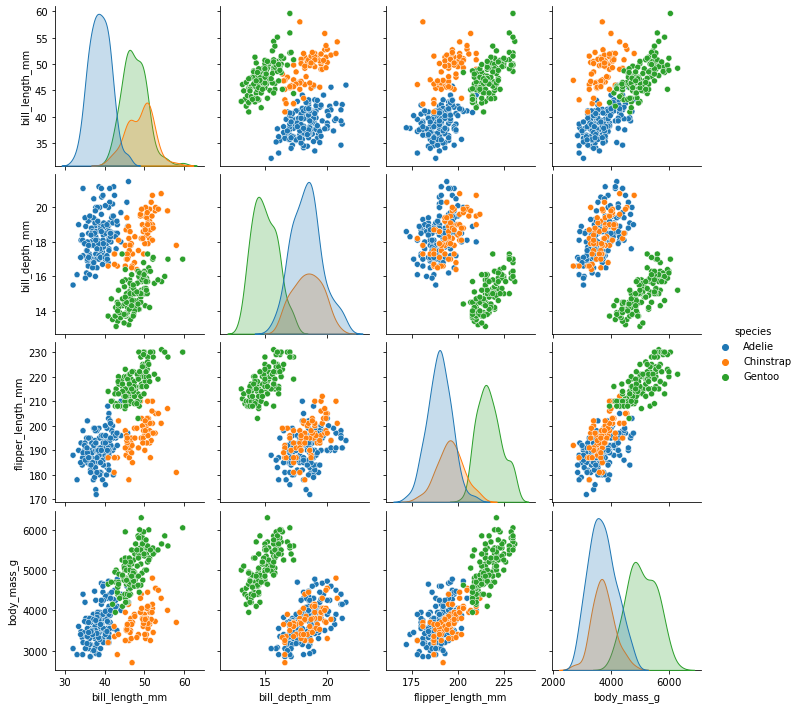

In [6]:
# We will now visualize data by pair-wise plotting
sns.pairplot(data=penguins, hue="species")

#Observations from pair-wise plots
1. Correlated features 2. Gentoo is easy to separate but the other two species show good overlap
Before proceeding further, we will remove rows with missing (NaN) entries, discard the island and sex columns

In [7]:
penguins = penguins.dropna()

In [8]:
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [13]:
data = penguins[["species","bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]# We will use this data to build classifiers

In [15]:
# We will shuffle the data now as the data is organized by species. Also divide the data into train/test set
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [27]:
data = shuffle(data)
data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
188,Chinstrap,47.6,18.3,195.0,3850.0
70,Adelie,33.5,19.0,190.0,3600.0
78,Adelie,36.2,16.1,187.0,3550.0
88,Adelie,38.3,19.2,189.0,3950.0
17,Adelie,42.5,20.7,197.0,4500.0


In [36]:
X = data[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = data[["species"]]
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
y = enc.fit_transform(y)
y = np.ravel(y)

In [37]:
y[0:4]

array([1., 0., 0., 0.])

In [38]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [45]:
# We will now try a few different classifiers
# The first classifier is a Naive Bayesian Classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [46]:
clf.predict(X_test)
print("Accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Accuracy: 0.96


In [47]:
# The second classifier is the Linear Discriminant Analysis (LDA) assuming pooled covariance matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
print("Accuracy: {:.2f}".format(lda.score(X_test,y_test)))

Accuracy: 0.99


In [49]:
# The third classifier is the Quadratic Discriminant Analysis; it assumes separate covariance matrices
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda.predict(X_test)
print("Accuracy: {:.2f}".format(qda.score(X_test,y_test)))

Accuracy: 0.99
